In [1]:
import networkx as nx
import itertools
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import networkx as nx
import matplotlib.pyplot as plt
from cltl.triple_extraction.api import Chat
from cltl.triple_extraction.cfg_analyzer import CFGAnalyzer
from cltl.triple_extraction.utils.helper_functions import utterance_to_capsules
import time
from transformers import pipeline
import numpy as np

In [2]:
# triplet_extractor = pipeline('text2text-generation', model='Babelscape/rebel-large', tokenizer='Babelscape/rebel-large')

RuntimeError: Failed to import transformers.models.bart.modeling_tf_bart because of the following error (look up to see its traceback):
No module named 'keras.engine'

In [3]:
# # download model
# qa_model = pipeline("question-answering")

# # test model
# question = "What is the best restaurant in Milan?"
# context = "Rome is the capital of Italy. Milan is a city in Italy. It has a lot of restaurants. The best restaurant there is KFC. The best restaurant in Madrid is McDonalds."
# qa_response = qa_model(question = question, context = context)
# print(qa_response)

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


RuntimeError: Failed to import transformers.models.distilbert.modeling_tf_distilbert because of the following error (look up to see its traceback):
No module named 'keras.engine'

In [4]:
import nltk 

nltk.download('all')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd 


# Create an instance of the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Function to conduct sentiment analysis on a sentence
def analyze_sentiment(sentence):
    sentiment_scores = sia.polarity_scores(sentence)
    return sentiment_scores

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/suhaibbasir/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/suhaibbasir/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/suhaibbasir/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/suhaibbasir/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/suhaibbasir/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]

In [5]:
def extract_triples1(sentence):
    chat = Chat("Leolani", "Lenka")
    analyzer = CFGAnalyzer()

    triples = []
    # Get user input
    user_input = sentence

    sentiment = analyze_sentiment(user_input)

    # check if the utterance is a question or statement
    if '?' in user_input:
        utterance_type = 'question'
    else:
        utterance_type = 'statement'


    # Add user utterance to the chat
    chat.add_utterance(user_input)

    # Analyze utterance in context
    analyzer.analyze_in_context(chat)

    # Print triples extracted from the last utterance
    # print(chat.last_utterance.triples)

    # Iterate through each triple and extract the subject, predicate, and object
    for utterance in chat.last_utterance.triples:
        subject_label = utterance['subject']['label'] if 'subject' in utterance and 'label' in utterance['subject'] else "Unknown"
        predicate_label = utterance['predicate']['label'] if 'predicate' in utterance and 'label' in utterance['predicate'] else "Unknown"
        object_label = utterance['object']['label'] if 'object' in utterance and 'label' in utterance['object'] else "Unknown"
        certainty_label = utterance['perspective']['certainty'] if 'perspective' in utterance and 'certainty' in utterance['perspective'] else "Unknown"
        polarity_label = utterance['perspective']['polarity'] if 'perspective' in utterance and 'polarity' in utterance['perspective'] else "Unknown"
        emotion_label = utterance['perspective']['emotion'] if 'perspective' in utterance and 'emotion' in utterance['perspective'] else "Unknown"
        current_time = time.strftime("%H:%M:%S", time.localtime())
        triple_dict = {
            'triple' : (subject_label, predicate_label, object_label),  
            'sentiment': sentiment['compound'],
            'certainty': certainty_label,
            'polarity': polarity_label,
            'emotion': emotion_label,
            'time': current_time,
            'utterance_type': utterance_type
        }
        triples.append(triple_dict)       
    
    return triples



In [6]:

def extract_triples2(text_file):
    chat = Chat("Agent", "User")
    analyzer = CFGAnalyzer()

    triples = []

    with open(text_file, 'r') as file:
        for line in file:
            # Get user input from each line in the text file
            user_input = line.strip()

            sentiment = analyze_sentiment(user_input)

            # check if the utterance is a question or statement
            if '?' in user_input:
                utterance_type = 'question'
            else:
                utterance_type = 'statement'

            # if type is a question then 

            # Check if the user wants to exit the loop
            if user_input.lower() == 'exit':
                print("Exiting the")
                print(len(triples))
                return triples

            # Add user utterance to the chat
            chat.add_utterance(user_input)

            # Analyze utterance in context
            analyzer.analyze_in_context(chat)

            # Iterate through each triple and extract the subject, predicate, and object
            for utterance in chat.last_utterance.triples:
                subject_label = utterance['subject']['label'] if 'subject' in utterance and 'label' in utterance['subject'] else "Unknown"
                predicate_label = utterance['predicate']['label'] if 'predicate' in utterance and 'label' in utterance['predicate'] else "Unknown"
                object_label = utterance['object']['label'] if 'object' in utterance and 'label' in utterance['object'] else "Unknown"
                certainty_label = utterance['perspective']['certainty'] if 'perspective' in utterance and 'certainty' in utterance['perspective'] else "Unknown"
                polarity_label = utterance['perspective']['polarity'] if 'perspective' in utterance and 'polarity' in utterance['perspective'] else "Unknown"
                emotion_label = utterance['perspective']['emotion'] if 'perspective' in utterance and 'emotion' in utterance['perspective'] else "Unknown"
                current_time = time.strftime("%H:%M:%S", time.localtime())
                triple_dict = {
                    'triple' : (subject_label, predicate_label, object_label),  
                    'meta-data': (sentiment['compound'], certainty_label, polarity_label, emotion_label, current_time, utterance_type)
                }
                triples.append(triple_dict)

    return triples


In [7]:
text_file = "sentences3.txt"
# extract triples from text
triples = extract_triples2(text_file)

2024-01-22 13:32:56 -     INFO -                                  cltl.triple_extraction.Chat - << Start of Chat with User >>
2024-01-22 13:32:56 -     INFO -                                  cltl.triple_extraction.Chat - No author  000: "That response was not very helpful."
2024-01-22 13:32:57 -     INFO -                          cltl.triple_extraction.cfg_analyzer - Found 4 triples
2024-01-22 13:32:58 -     INFO -                          cltl.triple_extraction.cfg_analyzer - final triple: {'subject': {'label': 'That-response', 'type': ['None', 'phenomenon']}, 'predicate': {'label': 'be', 'type': ['stative']}, 'object': {'label': 'very-helpful', 'type': ['adv']}, 'perspective': {'sentiment': 0.0, 'certainty': 1.0, 'polarity': -1.0, 'emotion': 0.0}} {'neg': True, 'aux': {'tense': 'simple past', 'person': ['first', 'third'], 'number': 'singular'}}
2024-01-22 13:32:58 -     INFO -                              cltl.triple_extraction.analyzer - GeneralStatementAnalyzer: Utterance type: "

In [8]:
# remove duplicate triples from the dictionary
triples = [dict(t) for t in {tuple(d.items()) for d in triples}]
print(triples)

[{'triple': ('That', 'feel', 'great'), 'meta-data': (0.6249, 1.0, 1.0, 0.0, '13:33:00', 'statement')}, {'triple': ('User', 'like', 'this-option'), 'meta-data': (-0.2755, 1.0, -1.0, 0.0, '13:32:59', 'statement')}, {'triple': ('User', 'would-prefer-to', 'go-to-an-italian-restaurant'), 'meta-data': (0.0, 1.0, 1.0, 0.0, '13:33:01', 'statement')}, {'triple': ('That-response', 'be', 'very-helpful'), 'meta-data': (-0.3713, 1.0, -1.0, 0.0, '13:32:58', 'statement')}, {'triple': ('User', 'would-hate-to', 'go-to-an-Indian-restaurant'), 'meta-data': (-0.5719, 1.0, 1.0, 0.0, '13:33:03', 'statement')}]


In [10]:
import datetime

# store the meta-data in a list
meta_data = []
for triple in triples:
    meta_data.append(triple['meta-data'])
display(meta_data)

def time_to_seconds(time_str):
    time_obj = datetime.datetime.strptime(time_str, '%H:%M:%S')
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

def encode_label(label):
    # Simple binary encoding for demonstration
    return 1 if label == "statement" else 0

vectorized_data = []
for item in meta_data:
    vector = list(item[:4])  # First four numerical values
    vector.append(time_to_seconds(item[4]))  # Convert time to seconds
    vector.append(encode_label(item[5]))  # Encode the label
    vectorized_data.append(vector)

print(vectorized_data)


[(0.6249, 1.0, 1.0, 0.0, '13:33:00', 'statement'),
 (-0.2755, 1.0, -1.0, 0.0, '13:32:59', 'statement'),
 (0.0, 1.0, 1.0, 0.0, '13:33:01', 'statement'),
 (-0.3713, 1.0, -1.0, 0.0, '13:32:58', 'statement'),
 (-0.5719, 1.0, 1.0, 0.0, '13:33:03', 'statement')]

[[0.6249, 1.0, 1.0, 0.0, 48780, 1], [-0.2755, 1.0, -1.0, 0.0, 48779, 1], [0.0, 1.0, 1.0, 0.0, 48781, 1], [-0.3713, 1.0, -1.0, 0.0, 48778, 1], [-0.5719, 1.0, 1.0, 0.0, 48783, 1]]


In [11]:
# store all triples in a list
triple_list = []
for triple in triples:
    triple_list.append(triple['triple'])
print(triple_list)

[('That', 'feel', 'great'), ('User', 'like', 'this-option'), ('User', 'would-prefer-to', 'go-to-an-italian-restaurant'), ('That-response', 'be', 'very-helpful'), ('User', 'would-hate-to', 'go-to-an-Indian-restaurant')]


In [47]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Load the spaCy model
nlp = spacy.load("en_core_web_md")

# Function to calculate cosine similarity using spaCy
def calculate_similarity(str1, str2):
    doc1 = nlp(str1)
    doc2 = nlp(str2)
    return doc1.similarity(doc2)


def add_and_connect_node2(graph, new_triple, similarity_threshold=0.6):
    """
    Adds a new node to the graph and connects it to existing nodes based on similarity.
    If the graph is initially empty, it just adds the node.

    :param graph: The NetworkX graph to which the node is to be added.
    :param new_triple: The new triple to be added as a node.
    :param similarity_threshold: The threshold for cosine similarity to establish an edge.
    """
    # check if the new triple already exists in the graph
    existing_triples = [data['triple'] for _, data in graph.nodes(data=True)]
    if new_triple in existing_triples:
        return graph
    
    # Create a new node ID
    new_node_id = f"Triple_{len(graph.nodes)}"
    graph.add_node(new_node_id, triple=new_triple)

    # If the graph is not empty, attempt to connect the new node to existing nodes
    if len(graph.nodes) == 0:
        # add the first node to the graph
        graph.add_node(new_node_id, triple=new_triple)
    if len(graph.nodes) > 1:
        for existing_node_id, existing_node_data in graph.nodes(data=True):
            if existing_node_id != new_node_id:
                for part_new, part_existing in itertools.product(new_triple, existing_node_data['triple']):
                    if calculate_similarity(part_new, part_existing) > similarity_threshold:
                        graph.add_edge(new_node_id, existing_node_id)
                        break  # Break if a connection is made to avoid multiple edges between same nodes

    return graph



('That', 'feel', 'great')
('User', 'like', 'this-option')
('User', 'would-prefer-to', 'go-to-an-italian-restaurant')
('That-response', 'be', 'very-helpful')
('User', 'would-hate-to', 'go-to-an-Indian-restaurant')


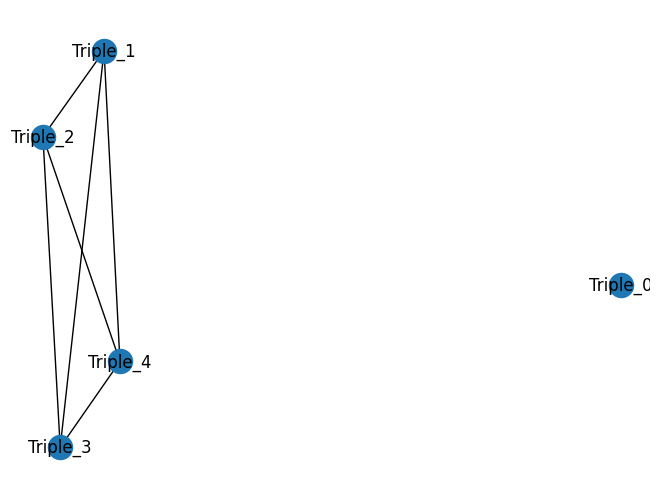

[('Triple_0', {'triple': ('That', 'feel', 'great')}), ('Triple_1', {'triple': ('User', 'like', 'this-option')}), ('Triple_2', {'triple': ('User', 'would-prefer-to', 'go-to-an-italian-restaurant')}), ('Triple_3', {'triple': ('That-response', 'be', 'very-helpful')}), ('Triple_4', {'triple': ('User', 'would-hate-to', 'go-to-an-Indian-restaurant')})]


In [60]:
# Your triples and graph initialization remains the same
triples = triple_list
G2 = nx.Graph()
# Connect triples using the new function
for utterance in triples:
    print(utterance)
    G2 = add_and_connect_node2(G2, utterance)
# Draw the graph
nx.draw(G2, with_labels=True)
plt.show()
print(G2.nodes(data=True))

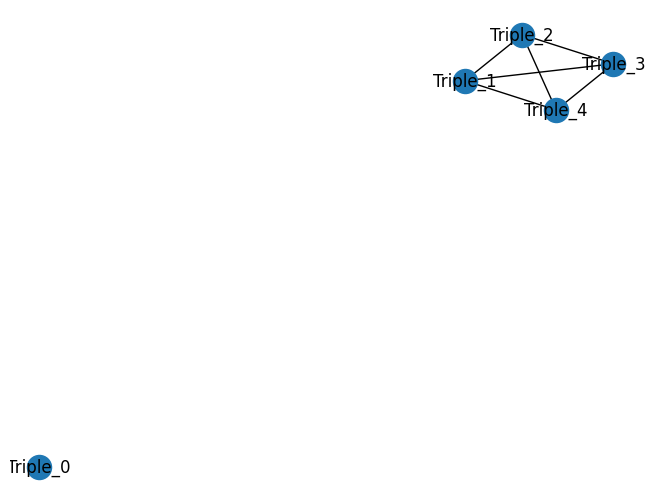

[('Triple_0', {'triple': ('That', 'feel', 'great')}), ('Triple_1', {'triple': ('User', 'like', 'this-option')}), ('Triple_2', {'triple': ('User', 'would-prefer-to', 'go-to-an-italian-restaurant')}), ('Triple_3', {'triple': ('That-response', 'be', 'very-helpful')}), ('Triple_4', {'triple': ('User', 'would-hate-to', 'go-to-an-Indian-restaurant')})]


In [49]:
# Your triples and graph initialization remains the same
triples = triple_list
G2 = nx.Graph()
triple_nodes = {}
for i, utterance in enumerate(triples):
    node_id = f"Triple_{i}"
    triple_nodes[node_id] = utterance
    G2.add_node(node_id, triple=utterance)

# Connect triples based on contextual similarity
similarity_threshold = 0.6
for node_id1, triple1 in triple_nodes.items():
    for node_id2, triple2 in triple_nodes.items():
        if node_id1 != node_id2:
            for part1, part2 in itertools.product(triple1, triple2):
                if calculate_similarity(part1, part2) > similarity_threshold:
                    G2.add_edge(node_id1, node_id2)
                    break

# Draw the graph
nx.draw(G2, with_labels=True)
plt.show()

print(G2.nodes(data=True))


In [50]:
# print the triple nodes
display(triple_nodes)

{'Triple_0': ('That', 'feel', 'great'),
 'Triple_1': ('User', 'like', 'this-option'),
 'Triple_2': ('User', 'would-prefer-to', 'go-to-an-italian-restaurant'),
 'Triple_3': ('That-response', 'be', 'very-helpful'),
 'Triple_4': ('User', 'would-hate-to', 'go-to-an-Indian-restaurant')}

In [56]:
new_triples = extract_triples1("That felt bad")

2024-01-22 13:56:23 -     INFO -                                  cltl.triple_extraction.Chat - << Start of Chat with Lenka >>
2024-01-22 13:56:23 -     INFO -                                  cltl.triple_extraction.Chat - No author  000: "That felt bad"
2024-01-22 13:56:24 -     INFO -                          cltl.triple_extraction.cfg_analyzer - Found 1 triples
2024-01-22 13:56:24 -     INFO -                          cltl.triple_extraction.cfg_analyzer - final triple: {'subject': {'label': 'That', 'type': ['None']}, 'predicate': {'label': 'feel', 'type': ['cognition']}, 'object': {'label': 'bad', 'type': []}, 'perspective': {'sentiment': 0.0, 'certainty': 1.0, 'polarity': 1.0, 'emotion': 0.0}} {'neg': False}
2024-01-22 13:56:24 -     INFO -                              cltl.triple_extraction.analyzer - GeneralStatementAnalyzer: Utterance type: "STATEMENT"
2024-01-22 13:56:24 -     INFO -                              cltl.triple_extraction.analyzer - GeneralStatementAnalyzer: RDF tr

In [59]:
# print the new triples
print(new_triples)

# extract the triple from the new triples
new_triple = new_triples[0]['triple']
print(new_triple)

[{'triple': ('That', 'feel', 'bad'), 'sentiment': -0.5423, 'certainty': 1.0, 'polarity': 1.0, 'emotion': 0.0, 'time': '13:56:24', 'utterance_type': 'statement'}]
('That', 'feel', 'bad')


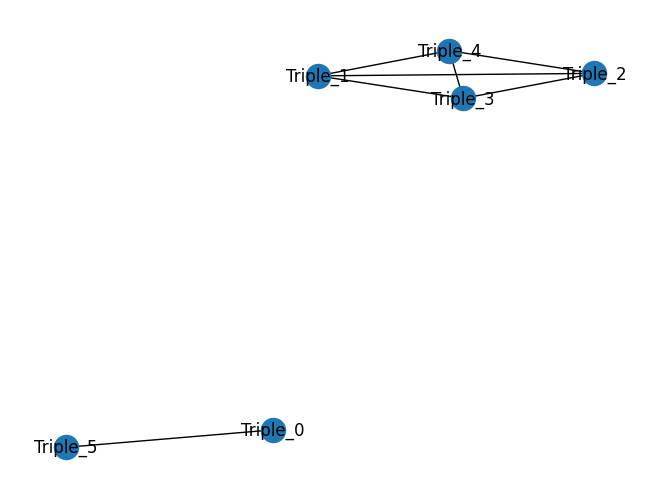

[('Triple_0', {'triple': ('That', 'feel', 'great')}), ('Triple_1', {'triple': ('User', 'like', 'this-option')}), ('Triple_2', {'triple': ('User', 'would-prefer-to', 'go-to-an-italian-restaurant')}), ('Triple_3', {'triple': ('That-response', 'be', 'very-helpful')}), ('Triple_4', {'triple': ('User', 'would-hate-to', 'go-to-an-Indian-restaurant')}), ('Triple_5', {'triple': ('That', 'feel', 'bad')})]


In [65]:
# add the new triples to the graph
G2 = add_and_connect_node2(G2, new_triple)

# print the graph
nx.draw(G2, with_labels=True)
plt.show()
print(G2.nodes(data=True))